In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df=pd.read_csv(r'C:\Users\Thor\Documents\Projects\credit card fraud\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Text(0,0.5,'frequency')

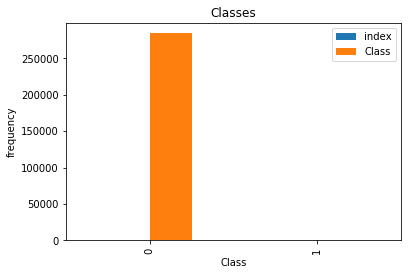

In [67]:
count_class=df['Class'].value_counts().reset_index()
count_class.plot(kind='bar')
plt.title('Classes')
plt.xlabel('Class')
plt.ylabel('frequency')

In [68]:
from sklearn.preprocessing import StandardScaler
df['normAmount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))
df=df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


#we will o resampling now
we will undersample the data set and will take non fraud values same as fraud values


In [69]:
Number_of_frauds=len(df[df.Class==1])
fraud_indices=np.array(df[df.Class==1].index)

In [70]:
normal_indices=df[df.Class==0].index

In [71]:
random_non_fraud=np.random.choice(normal_indices,Number_of_frauds,replace=False)

In [72]:
random_normal_indices=np.array(random_non_fraud)

In [73]:
under_sample_index=np.concatenate([fraud_indices,random_normal_indices])

In [74]:
under_sample_data=df.iloc[under_sample_index,:]
under_sample_data.head()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


In [75]:
under_sample_data.shape

(984, 30)

In [76]:
print('the percentage of non fraud cases',len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data))
print('the percentage of  fraud cases',len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data))

the percentage of non fraud cases 0.5
the percentage of  fraud cases 0.5


Text(0.5,1,' data correlation')

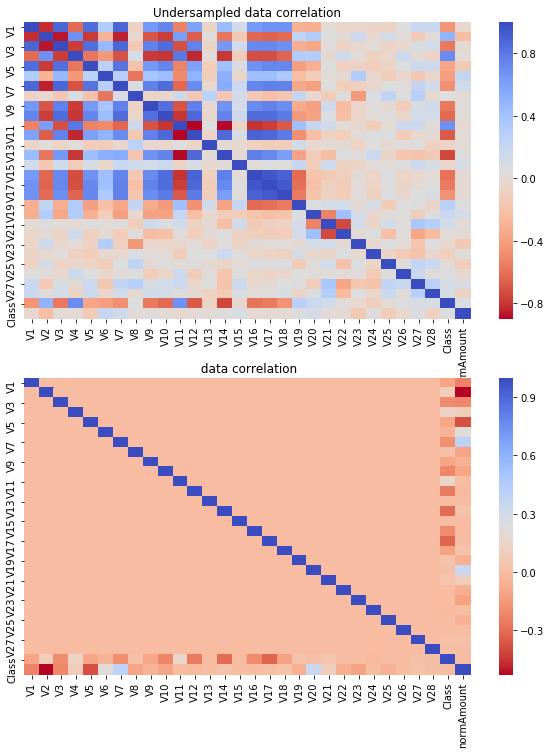

In [77]:
import seaborn as sns
corr=under_sample_data.corr()
corr1=df.corr()
f,(ax1,ax2)=plt.subplots(2,1,figsize=(10,12))
sns.heatmap(corr,cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('Undersampled data correlation')
sns.heatmap(corr1,cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title(' data correlation')

In [78]:
print(len(under_sample_data))

984


In [79]:
#seems like v10,v12,v14 are negatively correlated
#one thing we can do is drop them, or we can  detect some outliers in these columns and try to reduce the correlation, which will make our model better
#lets plot the distribution as check



C:\Users\Thor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'V14_fraud \n distribution')

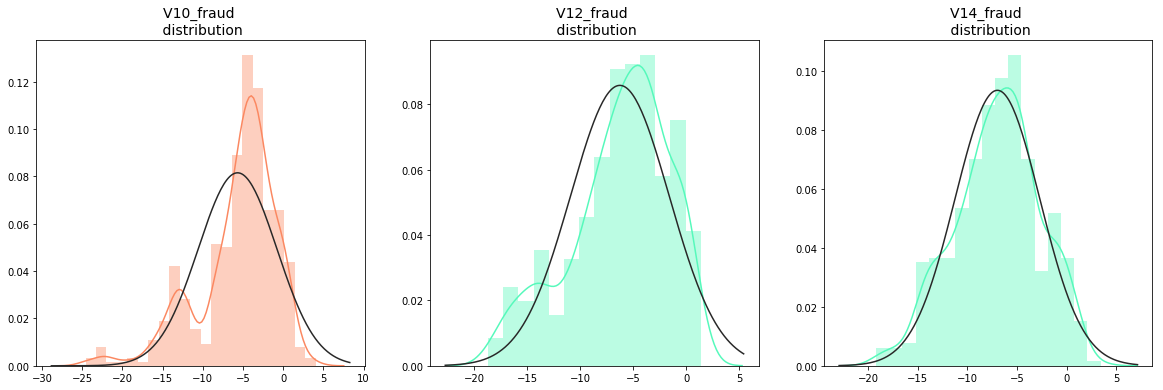

In [80]:
from scipy.stats import norm
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))
v10_fraud_list=under_sample_data['V10'].loc[under_sample_data['Class']==1].values
ax1=sns.distplot(v10_fraud_list,ax=ax1,fit=norm,color='#FB8861')
ax1.set_title('V10_fraud \n distribution',fontsize=14)

v12_fraud_list=under_sample_data['V12'].loc[under_sample_data['Class']==1].values
ax2=sns.distplot(v12_fraud_list,ax=ax2,fit=norm,color='#56F9BB')
ax2.set_title('V12_fraud \n distribution',fontsize=14)

v14_fraud_list=under_sample_data['V14'].loc[under_sample_data['Class']==1].values
ax3=sns.distplot(v14_fraud_list,ax=ax3,fit=norm,color='#56F9BB')
ax3.set_title('V14_fraud \n distribution',fontsize=14)

In [81]:
#lets try outlier detection,drop the outliers and see if the correlation gets better
#if still no change, we will drop them

In [82]:
q25,q75=np.percentile(v10_fraud_list,25),np.percentile(v10_fraud_list,75)
print('Quartile 25 :{}| Quartile 75: {}'.format(q25,q75))
v10_iqr=q75-q25
print('iqr:{}'.format(V10_iqr))
v10_cutoff=V10_iqr*1.5
v10_lower,v10_upper=q25-v10_cutoff,q75+v10_cutoff
print('Cut_off:{}'.format(v10_cutoff))
print('V10_lower:{}'.format(v10_lower))
print('V10_upper:{}'.format(v10_upper))
print('V10_lower:{}'.format(v10_lower))
outliers=[i for i in v10_fraud_list if i<v10_lower or i>v10_upper]
print('V10_outliers:{}'.format(outliers))
under_sample_data = under_sample_data.drop(under_sample_data[(under_sample_data['V10'] > v10_upper) |
                                                             (under_sample_data['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(under_sample_data)))
print('----' * 44)

print("**************************************************************************************************")



Quartile 25 :-7.7566982278474725| Quartile 75: -2.6141839131895623
iqr:5.142514314657911
Cut_off:7.713771471986866
V10_lower:-15.47046969983434
V10_upper:5.099587558797303
V10_lower:-15.47046969983434
V10_outliers:[-16.6496281595399, -18.2711681738888, -15.563791338730098, -15.563791338730098, -16.7460441053944, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -17.141513641289198, -16.3035376590131, -16.2556117491401, -16.6011969664137, -18.9132433348732, -20.949191554361104, -19.836148851696, -23.2282548357516, -24.403184969972802, -24.5882624372475]
Number of Instances after outliers removal: 962
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**************************************************************************************************


In [83]:
q25,q75=np.percentile(v12_fraud_list,25),np.percentile(v12_fraud_list,75)
print('Quartile 25 :{}| Quartile 75: {}'.format(q25,q75))
v12_iqr=q75-q25
print('iqr:{}'.format(v12_iqr))
v12_cutoff=v12_iqr*1.5
v12_lower,v12_upper=q25-v12_cutoff,q75+v12_cutoff
print('Cut_off:{}'.format(v12_cutoff))
print('V12_lower:{}'.format(v12_lower))
print('V12_upper:{}'.format(v12_upper))
print('V12_lower:{}'.format(v12_lower))
outliers=[i for i in v12_fraud_list if i<v12_lower or i>v12_upper]
print('V12_outliers:{}'.format(outliers))
under_sample_data = under_sample_data.drop(under_sample_data[(under_sample_data['V12'] > v12_upper) |
                                                             (under_sample_data['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(under_sample_data)))


print("**************************************************************************************************")




Quartile 25 :-8.688176521812306| Quartile 75: -2.9740880253849302
iqr:5.714088496427376
Cut_off:8.571132744641064
V12_lower:-17.25930926645337
V12_upper:5.597044719256134
V12_lower:-17.25930926645337
V12_outliers:[-17.7691434633638, -17.631606313870698, -18.047596570821604, -18.683714633344298, -18.553697009645802, -18.4311310279993]
Number of Instances after outliers removal: 956
**************************************************************************************************


In [84]:
q25,q75=np.percentile(v14_fraud_list,25),np.percentile(v14_fraud_list,75)
print('Quartile 25 :{}| Quartile 75: {}'.format(q25,q75))
v14_iqr=q75-q25
print('iqr:{}'.format(v14_iqr))
v14_cutoff=v14_iqr*1.5
v14_lower,v14_upper=q25-v14_cutoff,q75+v14_cutoff
print('Cut_off:{}'.format(v14_cutoff))
print('V14_lower:{}'.format(v14_lower))
print('V14_upper:{}'.format(v14_upper))
print('V14_lower:{}'.format(v14_lower))
outliers=[i for i in v14_fraud_list if i<v14_lower or i>v14_upper]
print('V14_outliers:{}'.format(outliers))
under_sample_data = under_sample_data.drop(under_sample_data[(under_sample_data['V14'] > v14_upper) |
                                                             (under_sample_data['V14'] < v14_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(under_sample_data)))
print('----' * 44)

Quartile 25 :-9.692722964972385| Quartile 75: -4.282820849486866
iqr:5.409902115485519
Cut_off:8.114853173228278
V14_lower:-17.807576138200663
V14_upper:3.8320323237414122
V14_lower:-17.807576138200663
V14_outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.049997689859396]
Number of Instances after outliers removal: 954
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


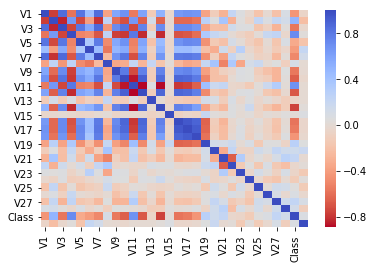

In [85]:
corr_New=under_sample_data.corr()
sns.heatmap(corr_New,cmap='coolwarm_r', annot_kws={'size':20})

In [86]:
print(under_sample_data)

              V1        V2        V3        V4        V5        V6         V7  \
541    -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545  -2.537387   
623    -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   0.325574   
4920   -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   0.562320   
6108   -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536  -3.496197   
6329    1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   1.713445   
6331    0.008430  4.137837 -6.240697  6.675732  0.768307 -3.353060  -1.631735   
6334    0.026779  4.132464 -6.560600  6.348557  1.329666 -2.513479  -1.689102   
6336    0.329594  3.712889 -5.775935  6.078266  1.667359 -2.420168  -0.812891   
6338    0.316459  3.809076 -5.615159  6.047445  1.554026 -2.651353  -0.746579   
6427    0.725646  2.300894 -5.329976  4.007683 -1.730411 -1.732193  -3.968593   
6446    0.702710  2.426433 -5.234513  4.416661 -2.170806 -2.667554  -3.878088   
6472    1.023874  2.001485 -

C:\Users\Thor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'V14_fraud \n distribution')

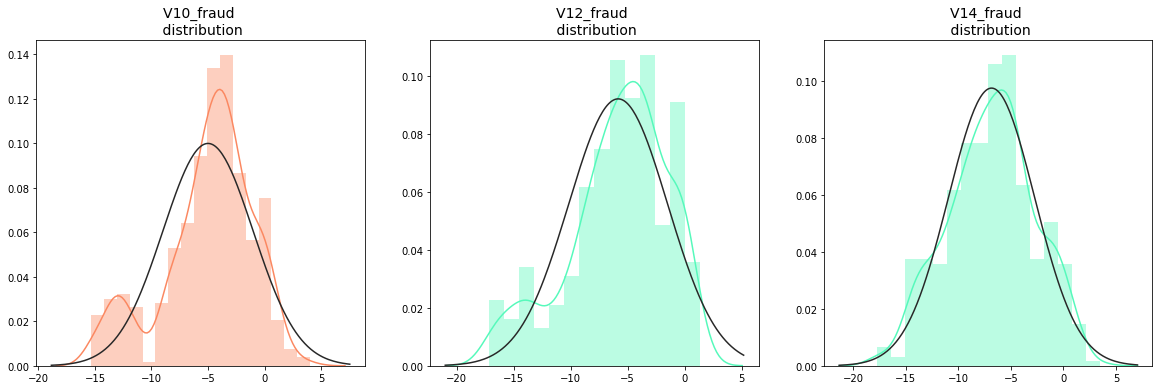

In [87]:
from scipy.stats import norm
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))
v10_fraud_list=under_sample_data['V10'].loc[under_sample_data['Class']==1].values
ax1=sns.distplot(v10_fraud_list,ax=ax1,fit=norm,color='#FB8861')
ax1.set_title('V10_fraud \n distribution',fontsize=14)

v12_fraud_list=under_sample_data['V12'].loc[under_sample_data['Class']==1].values
ax2=sns.distplot(v12_fraud_list,ax=ax2,fit=norm,color='#56F9BB')
ax2.set_title('V12_fraud \n distribution',fontsize=14)

v14_fraud_list=under_sample_data['V14'].loc[under_sample_data['Class']==1].values
ax3=sns.distplot(v14_fraud_list,ax=ax3,fit=norm,color='#56F9BB')
ax3.set_title('V14_fraud \n distribution',fontsize=14)

In [89]:
X=under_sample_data.drop('Class',axis=1)
y=under_sample_data['Class']

In [94]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [101]:
Classifiers={'LogisticRegression':LogisticRegression(),
            'Knearest':KNeighborsClassifier(),
            'Support Vector':SVC(),
            'DecisionTreeClassifier':DecisionTreeClassifier()}



In [103]:
from sklearn.model_selection import cross_val_score

for key,value in Classifiers.items():
        value.fit(X_train,y_train)
        training_score=cross_val_score(value,X_train,y_train,cv=5)
        print('Classifier:',value.__class__.__name__ ,'has a training score of',round(training_score.mean(),2)*100,'%accuracy score')

Classifier: LogisticRegression has a training score of 95.0 %accuracy score
Classifier: KNeighborsClassifier has a training score of 94.0 %accuracy score
Classifier: SVC has a training score of 94.0 %accuracy score
Classifier: DecisionTreeClassifier has a training score of 90.0 %accuracy score


In [104]:
from sklearn.model_selection import GridSearchCV

In [141]:
logreg_params={'penalty':['l1','l2'],'C': [0.01,0.10,1,10,100]}
grid_log_reg=GridSearchCV(LogisticRegression(),logreg_params)
grid_log_reg.fit(X_train,y_train)
log_reg=grid_log_reg.best_estimator_
print(log_reg)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [142]:
lr=LogisticRegression(C=1,penalty='l1')
lr.fit(X_train,y_train)
y_predlr=lr.predict(X_test)

In [143]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
print(knears_neighbors)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')


In [144]:
kn=KNeighborsClassifier(n_neighbors=2,algorithm='auto')
kn.fit(X_train,y_train)
y_predkn=kn.predict(X_test)

In [145]:
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_
print(svc)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [155]:
sv=SVC(C=1,kernel='linear')
sv.fit(X_train,y_train)
y_predsv=sv.predict(X_test)

In [156]:

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print(tree_clf)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [157]:
tr=DecisionTreeClassifier(criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
tr.fit(X_train,y_train)
y_predtr=tr.predict(X_test)


In [158]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.76%
Knears Neighbors Cross Validation Score 93.98%
Support Vector Classifier Cross Validation Score 94.23%
DecisionTree Classifier Cross Validation Score 92.53%


In [159]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [160]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9776494845360826
KNears Neighbors:  0.9388900343642612
Support Vector Classifier:  0.975085910652921
Decision Tree Classifier:  0.9244914089347078


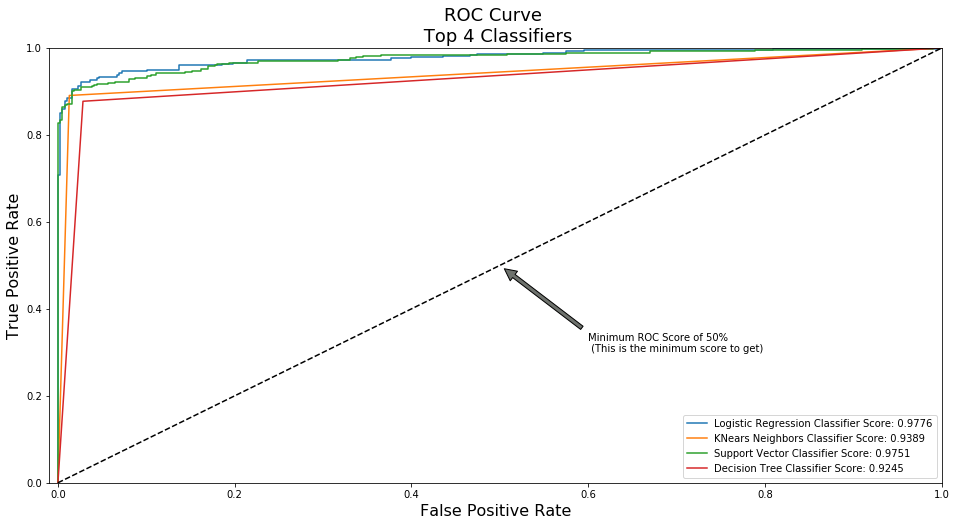

In [161]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)



plt.show()

In [162]:
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

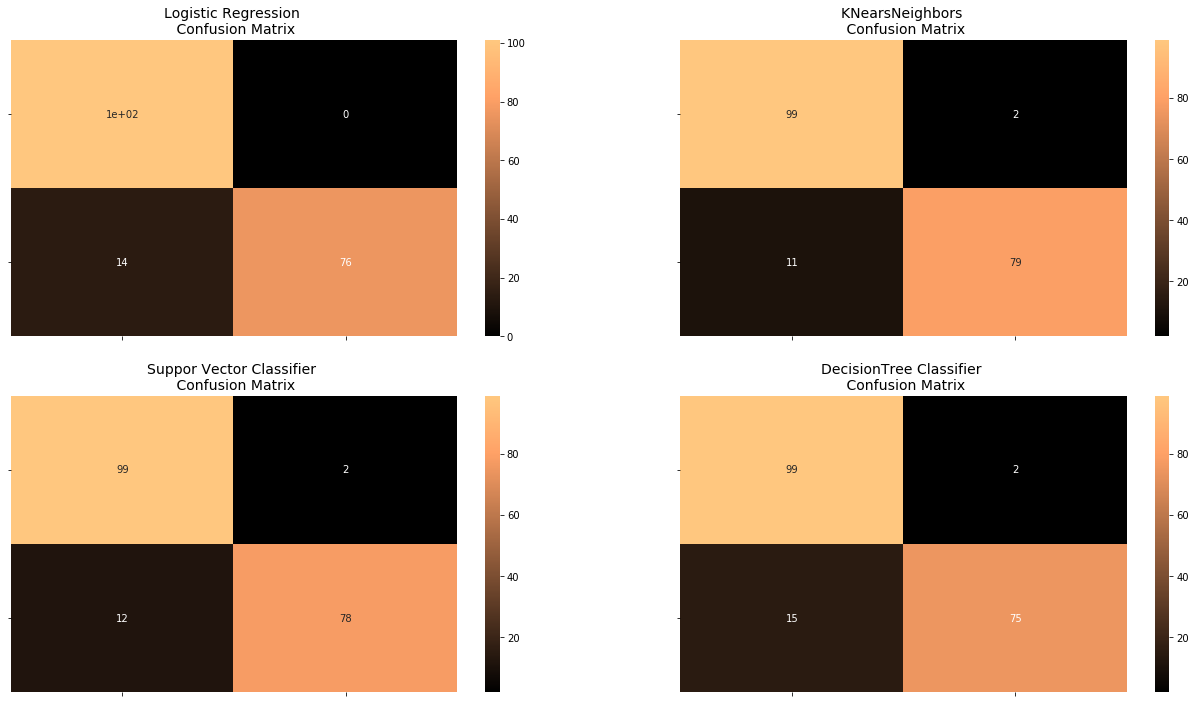

In [163]:
from sklearn.metrics import confusion_matrix


log_reg_cf = confusion_matrix(y_test, y_predlr)
kneighbors_cf = confusion_matrix(y_test, y_predkn)
svc_cf = confusion_matrix(y_test, y_predsv)
tree_cf = confusion_matrix(y_test, y_predtr)



fig, ax = plt.subplots(2, 2,figsize=(22,12))





sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [164]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_predlr))

print('KNears Neighbors:')
print(classification_report(y_test, y_predkn))

print('Support Vector Classifier:')
print(classification_report(y_test, y_predsv))

print('Support Vector Classifier:')
print(classification_report(y_test, y_predtr))

Logistic Regression:
             precision    recall  f1-score   support

          0       0.88      1.00      0.94       101
          1       1.00      0.84      0.92        90

avg / total       0.94      0.93      0.93       191

KNears Neighbors:
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       101
          1       0.98      0.88      0.92        90

avg / total       0.94      0.93      0.93       191

Support Vector Classifier:
             precision    recall  f1-score   support

          0       0.89      0.98      0.93       101
          1       0.97      0.87      0.92        90

avg / total       0.93      0.93      0.93       191

Support Vector Classifier:
             precision    recall  f1-score   support

          0       0.87      0.98      0.92       101
          1       0.97      0.83      0.90        90

avg / total       0.92      0.91      0.91       191

